In [50]:
import pandas as pd, os, gc
import networkx as nx, matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Data Set up

In [4]:
# ## Download and save the congresslist.edgelist in the required format
# ## Download link : https://snap.stanford.edu/data/congress-twitter.html
# ## Data source: C.G. Fink, K. Fullin, G. Gutierrez, N. Omodt, S. Zinnecker, 
# ## G. Sprint, and S. McCulloch: A centrality measure for quantifying spread 
# ## on weighted, directed networks. Physica A, 2023.

# G = nx.read_edgelist('data/congress_network/congress.edgelist')

# transition_G = nx.google_matrix(G)
# transition_G=pd.DataFrame(transition_G)

# # Save to Matrix format in txt (transpose to make it column wise stochastic)
# transition_G.T.to_csv('data/matrix-congress.txt', sep=' ', index=True, header=False)

In [5]:
edges=pd.read_csv(r'data/lastfm_asia/lastfm_asia_edges.csv')
edges

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


In [23]:
# import json
 
# # Opening JSON file
# f = open('lastfm_asia/lastfm_asia_features.json')
 
# # returns JSON object as 
# # a dictionary
# nodes = json.load(f)

# nodes=pd.DataFrame.from_dict(nodes, orient='index')
# nodes.isna().sum()

# target=pd.read_csv('lastfm_asia/lastfm_asia_target.csv')
# target

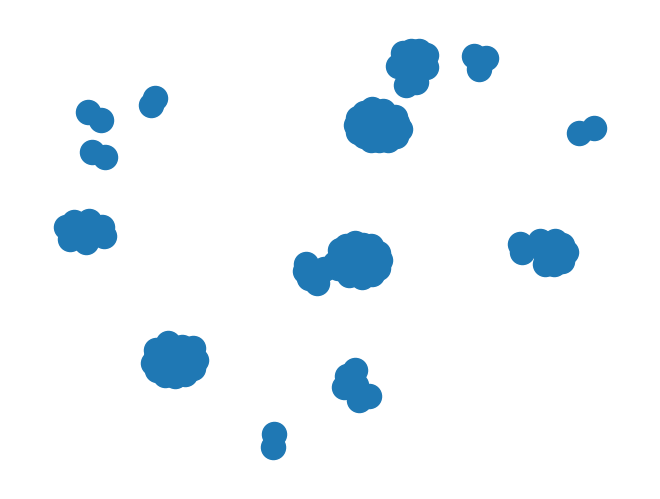

In [10]:
# TEST
G = nx.from_pandas_edgelist(edges.head(100), 'node_1', 'node_2')

# Visualize the graph
nx.draw(G, with_labels=False)
plt.show()

# Community

## Functions

In [37]:
def graph_community(G, community):
    # Visualize the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    # Assign community colors to nodes
    node_colors = []
    for node in G.nodes():
        for i, comm in enumerate(community):
            if node in comm:
                node_colors.append(i)
                break

    # Draw nodes with community colors
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.rainbow)

    # Optionally, draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    plt.show()

In [59]:
def get_metrics(G, community):
    """
    1. Modularity of the given partition of the graph
    
    2. Partition Quality:
    The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.
    The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.
    --> returns (coverage, performance) tuple of the partition
    """
    # similarity metrics
    
    modularity = nx.algorithms.community.modularity(G, community)
    partion_quality = nx.algorithms.community.partition_quality(G, community) 
#     silhouette = silhouette_score(G, community)

    # Ratio cut
    # ncut
    
    return {'modularity':modularity,
            'partition_quality':partion_quality,
#            'silhouette': silhouette
           }

In [71]:

silhouette_score(G, louvain)

ValueError: Expected 2D array, got 1D array instead:
array=[   0  747    1 4257 2194  580 6478 1222 5735 7146 2204  126 2639    2
  562 1492    6 5303 7128 4154 5179    3 1728 4560 5060 1351 6503 7089
 4319 6095  272 4433 2900 3381 5943 2107 6940 2013 6046 5823    4 5770
    5 5454 5856  667 6180  598  870 3079 1834 6283 7340 7279  342 4405
 1462 1284 1551 3291  167    7  177 6243 7589 2854 6931 6250  428 2142
    8 1686    9 4481 1795 2660 6053  246 3843 6441  366   10 5489   11
 5240  618 2412 1325 4919   12 5274 3807   13 1794 3971 1223 6152 5385
 1509  524 4770 1937 7315 1817 6298 2266 3557 5857  866 2789 3559].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
from sklearn.metrics.pairwise import pairwise_distances

# Assuming G is your graph and lcom is your detected communities

# Calculate Jaccard similarity between nodes' neighborhoods
def jaccard_similarity(node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    intersection = len(neighbors1.intersection(neighbors2))
    union = len(neighbors1.union(neighbors2))
    return intersection / union

# Compute pairwise similarity matrix
# n_nodes = len(G.nodes())
pairwise_similarities = [[jaccard_similarity(node1, node2) for node2 in G.nodes()] for node1 in G.nodes()]

# Compute silhouette score
silhouette = silhouette_score(pairwise_similarities, louvain, metric='precomputed')
silhouette

ValueError: Found input variables with inconsistent numbers of samples: [111, 13]

## Louvain

In [41]:
G = nx.from_pandas_edgelist(edges.head(100), 'node_1', 'node_2')
louvain=nx.community.louvain_communities(G, seed=123)
louvain

[{0, 747},
 {1, 126, 580, 1222, 2194, 2204, 2639, 4257, 5735, 6478, 7146},
 {2,
  6,
  167,
  342,
  562,
  598,
  667,
  870,
  1284,
  1462,
  1492,
  1551,
  1834,
  3079,
  3291,
  4154,
  4405,
  5179,
  5303,
  5856,
  6180,
  6283,
  7128,
  7279,
  7340},
 {3,
  272,
  1351,
  1728,
  2013,
  2107,
  2900,
  3381,
  4319,
  4433,
  4560,
  5060,
  5823,
  5943,
  6046,
  6095,
  6503,
  6940,
  7089},
 {4, 5770},
 {5, 5454},
 {7, 177, 428, 2142, 2854, 6243, 6250, 6931, 7589},
 {8, 1686},
 {9, 246, 366, 1795, 2660, 3843, 4481, 6053, 6441},
 {10, 5489},
 {11, 618, 1325, 2412, 4919, 5240},
 {12, 3807, 5274},
 {13,
  524,
  866,
  1223,
  1509,
  1794,
  1817,
  1937,
  2266,
  2789,
  3557,
  3559,
  3971,
  4770,
  5385,
  5857,
  6152,
  6298,
  7315}]

In [42]:
len(louvain)

13

In [43]:
louvain_sum=pd.DataFrame([len(i) for i in louvain], columns=['n_nodes']).reset_index().rename(columns={'index':'community'})
louvain_sum

,community,n_nodes
0,0,2
1,1,11
2,2,25
3,3,19
4,4,2
5,5,2
6,6,9
7,7,2
8,8,9
9,9,2


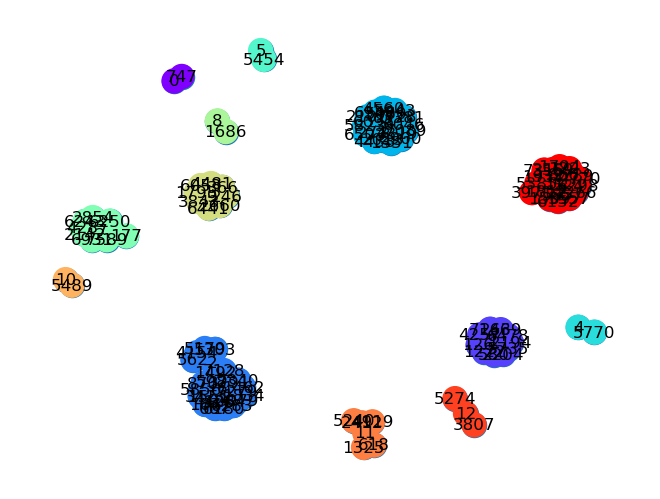

In [44]:
graph_community(G, community=louvain)

In [45]:
# # Visualize the graph
# nx.draw(G, with_labels=False)
# plt.show()

In [70]:
get_metrics(G, louvain)

{'modularity': 0.8414000000000001,
 'partition_quality': (1.0, 0.8866502866502867)}

# Influence Maximization

## words